# General Instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

* Do NOT import any other modules
* Do NOT change the prototypes of any of the functions
* Sample test cases are already given, test your code using these sample cases
* Grading will be based on hidden test cases
* Please solve this notebook using Google Colab as the required packages are already installed

Make sure you fill in any place that says `YOUR CODE STARTS HERE` or "YOUR ANSWER HERE", as well as your name and ID number below:

In [ ]:
NAME = ""
ID = ""

# Introduction

In Part 1a, we covered forward pass of Convolution Neural Networks from scratch. In this part, we will use Pytorch APIs to cover all the necessary components required to build an end-to-end computer vision network.

So far, we have an idea of what CNNs are and how they work. Now, we will use a combination of CNNs, activation functions, pooling layers, and fully connected networks to build an image classification model.

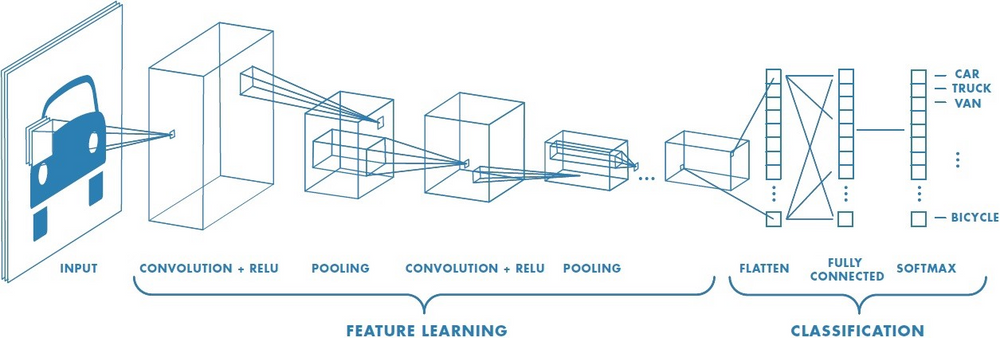

In [ ]:
# DO NOT IMPORT ANY OTHER LIBRARIES
# Load in relevant libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# set seed
torch.manual_seed(0)

# Dataset

We'll be using CIFAR-10 dataset. Some info about the dataset - 



*   The dataset has 60,000 color images (RGB) at 32px x 32px belonging to 10 different classes (6000 images/class). 
*   The dataset is divided into 50,000 training and 10,000 testing images.


In [ ]:
# DO NOT CHANGE THIS CELL
# Define relevant variables
batch_size = 64
num_classes = 10

## Data Transformation (EVALUATIVE)

(#TODO why do we perform data transformation?)

### TODO

1. Use [transforms.Compose](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Compose) to merge several transforms together.
2. Use [transforms.Resize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize) to resize all the input images and set their size to (32,32).
3. Use [transforms.ToTensor](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor) to convert all the input images to tensor.
4. Use [transforms.Normalize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize) to normalize images and set:
    * mean=[0.4914, 0.4822, 0.4465]
    * std=[0.2023, 0.1994, 0.2010]
    * Note: The mean and std values can be found online. These are calculated values specifically for CIFAR-10.






In [ ]:
### YOUR CODE HERE ###
all_transforms = 
### ENDS HERE ###

## Build train/test dataset (EVALUATIVE)

- Use [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html) to download CIFAR10.
- Set transform = all_transforms (from above cell) for both train and test dataset.

In [ ]:
### YOUR CODE HERE ###
# Create Training dataset
train_dataset = 
# Create Testing dataset
test_dataset = 
### ENDS HERE ###

## Build train/test loaders

Loading the whole dataset into the RAM at once is not a good practice and can seriously halt your computer. That's why we use data loaders, which allow you to iterate through the dataset by loading the data in batches.

- Use [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html)
- Set shuffle = True for both train and test dataloaders.
- Batch size has been provided at the top

In [ ]:
### YOUR CODE HERE ###
# Instantiate loader objects to facilitate processing
train_loader = 


test_loader = 
### ENDS HERE ###

# End-to-end Network: Resnet18

For in-depth explanation, feel free to watch [this video](https://youtu.be/GWt6Fu05voI).

Paper Link: [https://arxiv.org/abs/1512.03385](https://arxiv.org/abs/1512.03385)

Abstract: Deeper neural networks are more difficult to train. We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously. We explicitly reformulate the layers as learning residual functions with reference to the layer inputs, instead of learning unreferenced functions. We provide comprehensive empirical evidence showing that these residual networks are easier to optimize, and can gain accuracy from considerably increased depth. On the ImageNet dataset we evaluate residual nets with a depth of up to 152 layers---8x deeper than VGG nets but still having lower complexity. An ensemble of these residual nets achieves 3.57% error on the ImageNet test set. This result won the 1st place on the ILSVRC 2015 classification task. We also present analysis on CIFAR-10 with 100 and 1000 layers.
The depth of representations is of central importance for many visual recognition tasks. Solely due to our extremely deep representations, we obtain a 28% relative improvement on the COCO object detection dataset. Deep residual nets are foundations of our submissions to ILSVRC & COCO 2015 competitions, where we also won the 1st places on the tasks of ImageNet detection, ImageNet localization, COCO detection, and COCO segmentation.


## Basic building block of Resnet

Follow the steps shown in the diagram below to build a ResBlock:
1. Store the original input by passing through identity function. Let's call it x.
2. Pass the input through Conv Layer -> Batch Norm -> ReLU -> Conv Layer -> Batch Norm. Let's call it f(x).
3. Skip connection: perform x + f(x).
4. Pass the addition product through ReLU activation to get the final output. 


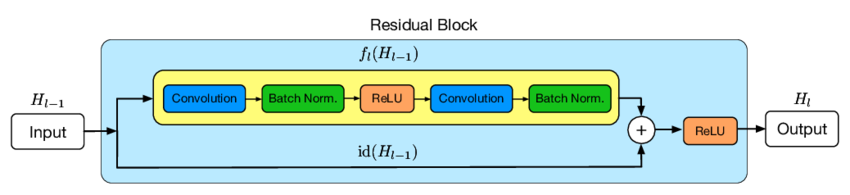

We start by creating a class that inherits the `nn.Module` class, and then we define the layers and their sequence of execution inside `__init__` and `forward` respectively.


Following links might be helpful. 

*   [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
*   [nn.BatchNorm2d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)
*   [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)


TODO

* In the `__init__` function, define the required layers as shown in above diagram.
* In the `forward` function, follow the steps mentioned above. 



In [ ]:
class ResBlock(nn.Module):
    
    def __init__(self, in_channels, out_channels, identity_downsample=None, stride=1):
        super(ResBlock, self).__init__()
        """
        1. kernel_size = 3 and padding = 1 for both conv layers
        2. use the argument stride for conv1 layer and stride=1 for conv2 layer
        3. input channels = in_channels and output channels = out_channels for conv1
        4. input and output channels = out_channels for conv2
        """
        ### YOUR CODE HERE ###
        self.conv1 = 
        self.bn1 = 
        self.conv2 = 
        self.bn2 = 
        self.relu = 
        ### ENDS HERE ###
        """
        We'll need identity_downsample when the dimensions f(x), i.e., output of
        step2 is not the same as x
        """
        self.identity_downsample = identity_downsample
        
        
    def forward(self, x):
        ### YOUR CODE HERE ###
        #step 1
        identity = 
        #step2






        #do not modify this if condition, change your variable names accordingly
        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)
        #step3
        
        #step4
        
        ### ENDS HERE ###
        return x

In [ ]:
# Sample test case 1
torch.manual_seed(0)
block = ResBlock(3, 3, None, 1)
x1 = torch.randn((1, 3, 32, 32))
y1 = block(x1)
assert x1.shape == y1.shape
print('Sample Test passed', '\U0001F44D')

In [ ]:
# Sample test case 2
assert y1[0][0][0][10].item() == 0
print('Sample Test passed', '\U0001F44D')

In [ ]:
# Hidden test case 1
assert y1[0][0][0][25].item() == 0
print('Sample Test passed', '\U0001F44D')

## Complete Architecture of Resnet18

The below table provides the dimensions used in different variants of ResNet. We will be implementing ResNet-18 in this assignment. Feel free to experiment with other variants as well !

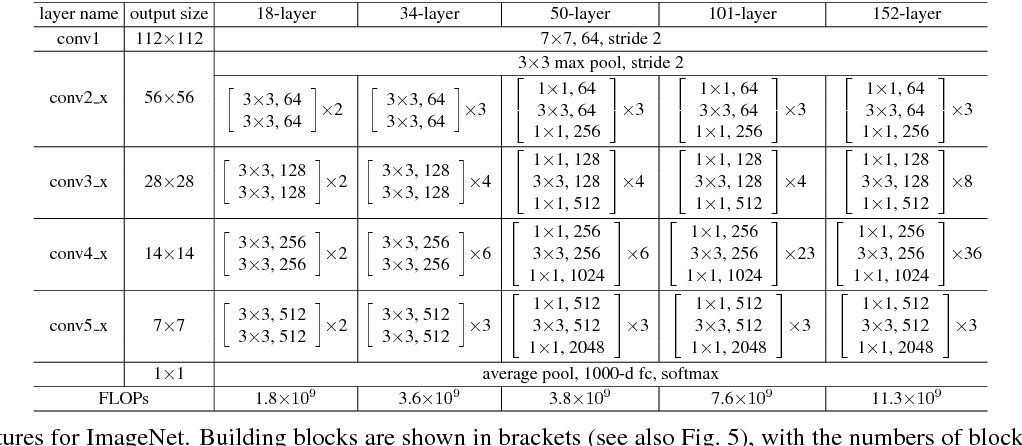

In [ ]:
class ResNet18(nn.Module):
    
    def __init__(self, image_channels, num_classes):
        
        super(ResNet18, self).__init__()
        """
        We have implemented conv1 layer to help you understand read the above 
        the above table. 
        """
        self.in_channels = 64
        self.conv1 = nn.Conv2d(image_channels, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64) 
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        ### YOUR CODE HERE ###
        """
        - Here you'll be initializing layers conv2_x to conv5_x. 
        - stride = 1 for layer1 and 2 for the rest.
        Hint: complete make_layer function first and call it here. 
        """
        self.layer1 = 
        self.layer2 = 
        self.layer3 = 
        self.layer4 = 
        
        ### ENDS HERE ###

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

        
    def make_layer(self, in_channels, out_channels, stride):
        identity_downsample = None
        if stride != 1:
            ### YOUR CODE HERE ###
            identity_downsample = 
            ### ENDS HERE ###

        ### YOUR CODE HERE ###
        """
        Call `ResBlock` here.  You already have info about all the arguments 
        that needs to be passed to ResBlock.
        Hint1: use nn.Sequential to make one layer.
        Hint2: you will need two ResBlocks to make one layer
        """
        return 
        ### ENDS HERE ###

    def identity_downsample(self, in_channels, out_channels):
        ### YOUR CODE HERE ###
        return 
        ### ENDS HERE ###
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x 

In [ ]:
# Sample test case 1
torch.manual_seed(0)
with torch.no_grad():
    test_model = ResNet18(3, 10)
    x1 = torch.randn((2,3,32,32))
    y1 = test_model(x1)
assert y1.shape == (2,10)
print('Sample Test passed', '\U0001F44D')

In [ ]:
# Sample test case 2
assert round(y1[0][0].item(), 3) == -0.24
print('Sample Test passed', '\U0001F44D')

In [ ]:
# Hidden test case 1
assert round(y1[1][0].item(), 3) == 0.04
print('Sample Test passed', '\U0001F44D')

That's all you had to do. Now run the rest of the cells, sit back and watch your model train!

# Training (Non-evaluative)

Run these cells to verify your code. If your model achieves a training accuracy of > 90% and a test accuracy of > 70%, then your code is correct. 

Note that this concept is called overfitting. There are certain ways to deal with it but that is out of scope of this assignment. Although feel free to go through [this article](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/#:~:text=Overfitting%20in%20Machine%20Learning&text=Overfitting%20happens%20when%20a%20model,as%20concepts%20by%20the%20model.) if you're curious about it. 

In [ ]:
torch.manual_seed(0)
model = ResNet18(3, num_classes)
model.to(device)

In [ ]:
learning_rate = 0.001
num_epochs = 10

In [ ]:
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [ ]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
torch.manual_seed(0)
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Now is a good time to take a break. This will take some time to train.

# Evaluation

We wrap the code inside `torch.no_grad()` as there is no need to calculate any gradients. We then predict each batch using our model and calculate how many it predicts correctly.

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(50000, 100 * correct / total))

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))

# End of this part.
Assignment by:

Achleshwar Luthra (f20180401@pilani.bits-pilani.ac.in)